# Linguistic Analysis of Books: A Study of Language Variability
---

Patterns within written text are not the same across all authors or languages. This allows linguists to study the language of origin.

This study aims to explore the attributes of individual books within a collection encompassing diverse authors and languages. Specifically, the focus is on analyzing book lengths, quantifying unique word counts and investigating potential clustering patterns based on either languages or authorship.

- The collection for this study consists of four languages: `English`, `French`, `German` and `Portuguese`.

- For each langauge, we have from one to four authors each, `13` authors in total.

- For each author, we have from one to sixteen book, `102` books in total.

Some authors have appeared in several language categories because their books are available as translations in several languages.

## Task Description
---

**Task 1 - Writing the Function** 
- **Description**: A function that takes string of text as input and counts the number of times each unique word appears.

**Task 2 - Word Frequency Distribution Analysis**
- **Description**: Process the text data from various translations to determine the frequency of occurrence for each individual word.

**Task 3 - Summary Statistics**
- **Description**: Computing the summary statistical measures, including mean word lengths for different translation.

**Task 4 - Data Visualization**
- **Description**: Generating visually informative representations to convey distribution of word frequencies.

The best way to keep track of these words will be to associate each word with a counter. This can be done by using dictionaries. The keys will be words of type `string` containing the input text, and the values are `int` that indicate how many times each word appears in the text.

Initially, a test string named `text` is generated to evaluate the function's functionality during its development.

In [1]:
text = "This is my test text. We are keeping this text short to keep things manageable."

In [2]:
word_list = list(text.split())

word_list

['This',
 'is',
 'my',
 'test',
 'text.',
 'We',
 'are',
 'keeping',
 'this',
 'text',
 'short',
 'to',
 'keep',
 'things',
 'manageable.']

When counting the number of unique words in a string, it is important to consider the following factors:

- The presence of punctuation, such as full stops, as part of the word may result in an inflated word count. **For instance**, a word occuring in the middle of a sentence is counted seperately when it reappears at the end of a sentence, followed by a full stop.

- Words at the beginning of sentences are capitalized, leading to the double counting of some words. As a result, words with both capitalized and lowercase initial letters are perceived as distinct entities in the counting process.

To address the issue of punctuation marks, a strategy can be implemented where specific punctuation marks to be excluded are specified. A loop is applied to the string, replacing each occurrence of a punctuation mark with an empty string. This approach ensures the exclusion of punctuations from the word counting process, allowing for accurate results.

Additionally, convering the entire string to lowercase can be done using the `.lower()` method.

## Functions
---

In [3]:
def clean_string(input_string):
    """
    The function takes in a string containing punctuation marks and returns the
    modified string without any punctuations.
    
    Input
        input_string (str) - string containing punctuations
    
    Return:
        clean_string - string with punctuations replaced by empty string
    """
    
    check_list = [",",".",";",":","'",'"',"!","?"]
    clean_string = input_string.lower()
    
    for ch in check_list:
        
        clean_string = clean_string.replace(ch,"")
        
    return clean_string

In [4]:
print(clean_string(text))

this is my test text we are keeping this text short to keep things manageable


The `count_words` function takes an input string and processes it to create a dictionary representing the word occurrences.

In [5]:
def count_words(the_string):
    """ 
    Count the number of times each word occurs in input string. 
    Returns a dictionary where keys are unique words and values are word counts.
    
    Inputs:
        the_string (str): Input string
        
    Return:
        word_count (dict): Dictionary of word count
    """
    
    word_count = {}
    
    working_string = clean_string(the_string)
    word_list = working_string.split()
    
    for word in word_list:
        
        if word in word_count:
            
            word_count[word] += 1
        
        else:
            
            word_count[word] = 1
            
    return word_count

With the function successfully defined, it is now time to perform testing on the test string.

In [6]:
print("Input: {}\n".format(text))
print(count_words(text))

Input: This is my test text. We are keeping this text short to keep things manageable.

{'this': 2, 'is': 1, 'my': 1, 'test': 1, 'text': 2, 'we': 1, 'are': 1, 'keeping': 1, 'short': 1, 'to': 1, 'keep': 1, 'things': 1, 'manageable': 1}


Counting the frequency of objects is such a common operation that Python provides a `counter` tool, which has to be imported from the collection moddule.

The object returned by counter behaves much like a dictionary, although its a subclass of the Python dictionary object.

The task of counting object frequencies is a frequent operation in Python, and to facilitate this, Python offers a `Counter` tool available in the `collections` module, which needs to be imported for usage.

The `Counter` object returned by this tool closely resembles a dictionary in behavior, despite being a subclass of the Python dictionary object.

In [7]:
from collections import Counter

In [8]:
def count_words_fast(the_string):
    """  
    Count the occurrences of each word in the input string 
    using the 'Counter' tool.

    Input
        the_string (str): The input string to be processed 
        for word counting

    Return:
        word_count (Counter): A 'Counter' object containing 
        unique words and their respective counts
    """
    
    working_string = clean_string(the_string.lower())
    word_list = working_string.split(" ")
    
    word_count = Counter(word_list)
    
    return word_count

The function `count_words_fast` returns a `Counter` object.

To verify whether the objects returned by `count_words` and `count_words_fast` are distinct or identical, a comparison is performed.

In [9]:
count_words_fast(text) == count_words(text)

True

The two different implementations of the same function return identical objects.

## Working with books
---

The `read_book` function takes a `path_title` as input, which represents the path location of the book to be read. It uses the `open` function with the specified path to access and read the content of the book from the file.

In [10]:
def read_book(path_title):
    """
    The function reads a book from the path location and returns 
    it as a string.
    
    Input
        path_title - path for a book
    
    Return
        book - returns the book as a string
    """
    
    with open(path_title, "r", encoding="utf8") as current_file:
        
        text = current_file.read()
        book = text.replace("\n","").replace("\r","")
        
    return book

In [11]:
import os 

In [12]:
relative_path = "./books/"

In [13]:
hamlet_path = os.path.join(relative_path,'English/shakespeare/Hamlet.txt')

Upon examining the value returned by `len`, it becomes evident that the `read_book` function has read in 150838 for the English version of Hamlet.

In [14]:
hamlet = read_book(hamlet_path)

print("Number of characters: {}".format(len(hamlet)))

Number of characters: 150838


Let's check the famous quote `To be or not to be` can be found in the Hamlet file.

In [15]:
hamlet_quote = "To be or not to be"

The `.find` method helps in identifying the index position of a substring within a given string. If the substring is present in the string, the method returns the first index of occurrence. Otherwise, it returns -1.

In [16]:
# line 1
start_ind = hamlet.find(hamlet_quote)

# line 2
hamlet[start_ind : start_ind + 50 ]

'To be or not to be that is the QuestionWhether tis'

**Line 1** 
First, the `.find` method is used to search for the first occurrence of `hamlet_quote` substring within `hamlet`. The index position of the first character of the substring (if found) is stored in the variable `start_ind`.

**Line 2**
Next, the substring is extracted from `hamlet` using string indexing. The start index is given by `start_ind` and the stop index extends up to the next 50 characters.

## Computing Word Frequency Statistics
---

The objective of `word_stats` function is to determine the total count of unique words present in the book and obtain the frequencies of each word. 

In [17]:
def word_stats(book_title):
    """
    Function takes in a book title as it's input and returns the 
    number of unique word and frequencies of each word.
    
    Input
        book_title (str) - Name of the book
    
    Returns
        A tuple object is returned
        
        num_unique (int) - Number of unique words
        counts (int) - Frequency of each unique word
    """
    
    word_count = count_words(book_title)
    
    num_unique = len(word_count)
    counts = word_count.values()
    
    return (num_unique, counts)

In [18]:
hamlet_stats = word_stats(hamlet)

hamlet_unique = hamlet_stats[0]
hamlet_total = sum(hamlet_stats[1])

print("Hamlet (English) - Unique Words: {} | Total Words: {}".format(hamlet_unique,hamlet_total))

Hamlet (English) - Unique Words: 6775 | Total Words: 26701


`word_stats` can be used to make a comparison between Shakespeare's Hamlet in English and it's German translation. This comparison will involve analyzing the unique word counts and word frequencies in both versions of the book.

In [19]:
hamlet_german_path = os.path.join(relative_path,"German/shakespeare/Hamlet.txt")

hamlet_german = read_book(hamlet_german_path)

german_hamlet_stats = word_stats(hamlet_german)

In [20]:
german_hamlet_unique = german_hamlet_stats[0]
german_hamlet_total = sum(german_hamlet_stats[1])

print("Hamlet (English) - Unique Words: {} | Total Words: {}".format(hamlet_unique,hamlet_total))

print("Hamlet (German) - Unique Words: {} | Total Words: {}".format(german_hamlet_unique,german_hamlet_total))

Hamlet (English) - Unique Words: 6775 | Total Words: 26701
Hamlet (German) - Unique Words: 9469 | Total Words: 30689


English version of Hamlet contains `6775` unique words out of a total of `26701` words. On the other hand, the German translation of Hamlet consits of `9469` unique words among a total of `30689` words.

This difference may be attributed to the inherent linguistic differences between the two languages and the nuances introduced during the translation process.

## Reading Multiple Files
---

The next step is to systematically read and process each book stored within distinct subdirectories located within our designated book folder.

In [21]:
relative_path

'./books/'

The directory for books, which is stored in `relative_path` contains the four languages: English, German, French and Portuguese.

In [22]:
os.listdir(relative_path)

['.DS_Store', 'German', 'English', 'Portuguese', 'French']

### Helper Function
---

The `listdir_nohidden` function lists all non-hidden files present within a specified directory.

The function takes `path` as input, representing the directory to be scanned. It then iterates through the files in the directory using `os.listdir`. For each file, the function checks if it starts with a dot (indicating a hidden file). 
If the file is not hidden, it is appended to the list of files `file_list`.

In [23]:
def listdir_nohidden(path):
    """   
    List all non-hidden files in the specified directory.

    Inputs:
        path (str): The path of the directory to be scanned for
        non-hidden files

    Returns:
        file_list (list): A list of non-hidden files
    """
    
    file_list = []
    
    for file in os.listdir(path):
        if not file.startswith('.'):
            file_list.append(file)
            
    return file_list

In [24]:
# Using 'listdir_nohidden' to print all the languages
print('Languages: {}'.format(listdir_nohidden(relative_path)))

# Using 'listdir_nohidden' to print all the French authors
print("French Authors: {}".format(listdir_nohidden(relative_path + "/French")))

Languages: ['German', 'English', 'Portuguese', 'French']
French Authors: ['de Maupassant', 'diderot', 'chevalier', 'shakespeare', 'sand']


The first loop iterates over the different languages.

The first loop iterates over the different languages.

The second loop is going through the author directory, which is created by concatenating strings of book directory path `relative_path` with current `language`.

The innermost loop is used to loop over different book titles. The `title` variable that iterates through the book title directory is obtained by concatenating `relative_path` with currenth `language` and current `author`.

In [26]:
# looping over languages
for language in listdir_nohidden(relative_path):
    
    # looping over authors
    for author in listdir_nohidden(relative_path + "/" + language):
        
        # looping over book titles
        for title in listdir_nohidden(relative_path + "/" + language + "/" + author):
            
            book_path = relative_path + "/" + language + "/" + author + "/" + title
            book = read_book(book_path)
            unique_words, total_words = word_stats(book)
            
            #print("Title: {} | Unique Words: {}".format(title[:-4],unique_words))
            #print("Title: {} | Author: {}".format(title[:-4],author))
            #print()

## Book Stats Table
---

Let's create a table for the books that will have the following columns:

    * Language
    * Author
    * Title
    * Length
    * Unique

In [27]:
table_columns = ['Author', 'Title', 'Language', 'Length', 'Unique']

In [28]:
def book_stats(column_list, relative_dir):
    """  
    Generate a pandas DataFrame containing statistics for books
    in different languages and authors.

    Inputs:
        column_list (list): A list containing the column names for
         the DataFrame (table)
         relative_dir (str): The book directory

    Returns:
        table (pd.DataFrame) - DataFrame containing book statistics
    """

    import pandas as pd 
    table = pd.DataFrame(columns = column_list)

    row_num = 1

    for language in listdir_nohidden(relative_dir):

        for author in listdir_nohidden(relative_dir + "/" + language):

            for title in listdir_nohidden(relative_dir + "/" + language + "/" + author):

                book_path = os.path.join(relative_dir + "/" + language + "/" + author + "/" + title)
                book = read_book(book_path)

                unique_words, total_words = word_stats(book)
                table.loc[row_num] = author.title(), title.replace(".txt",""), language, sum(total_words), unique_words
                row_num += 1

    return table 


In [29]:
stats = book_stats(table_columns,relative_path) 

In [30]:
stats.shape

(102, 5)

The `.shape` attribute of DataFrame object returns the number of rows contained in the dataframe and the number of columns.

In this case, the `stats` dataframe contains 102 rows and 5 columns.


Looking at the first five and the last five entries of the `stats` dataframe.

In [31]:
stats.head()

,Author,Title,Language,Length,Unique
1,Schiller,Wallensteins Lager,German,13302,4240
2,Schiller,die braut von messina,German,22349,6344
3,Schiller,"Der Parasit, oder die Kunst, sein GlÅck zu ma...",German,18515,5918
4,Schiller,Die Verschwîrung des Fiesco zu Genua,German,28042,9995
5,Schiller,Kabale und Liebe,German,28433,9607


In [32]:
stats.tail()

,Author,Title,Language,Length,Unique
98,Sand,La Marquise,French,14529,4755
99,Sand,L' Orco,French,8558,3134
100,Sand,Mattea,French,20902,6390
101,Sand,Metella,French,19411,5645
102,Sand,Oeuvres illustrÇes de George Sand,French,22545,7441


## Plotting Book Statistics
---

The process of extracting data from specific columns of a dataframe is achieved using the column names as identifiers. By referencing the desired column names, we can retrieve the data contained in those specific columns.

In [33]:
import matplotlib.pyplot as plt

The rows of the `stats` dataframe are filtered to extract statistics for `Hamlet`. The extracted data is stored in the dataframe `hamlet_stats`.


In [34]:
hamlet_stats = stats[stats["Title"] == "Hamlet"]

In [35]:
hamlet_stats

,Author,Title,Language,Length,Unique
34,Shakespeare,Hamlet,German,30689,9469
40,Shakespeare,Hamlet,English,26701,6775
58,Shakespeare,Hamlet,Portuguese,29860,9491


The book statistics stored in `stats` is used to create a plot where the length of the books are plotted along the horizontal axis and the number of unique words are plotted along the vertical axis.

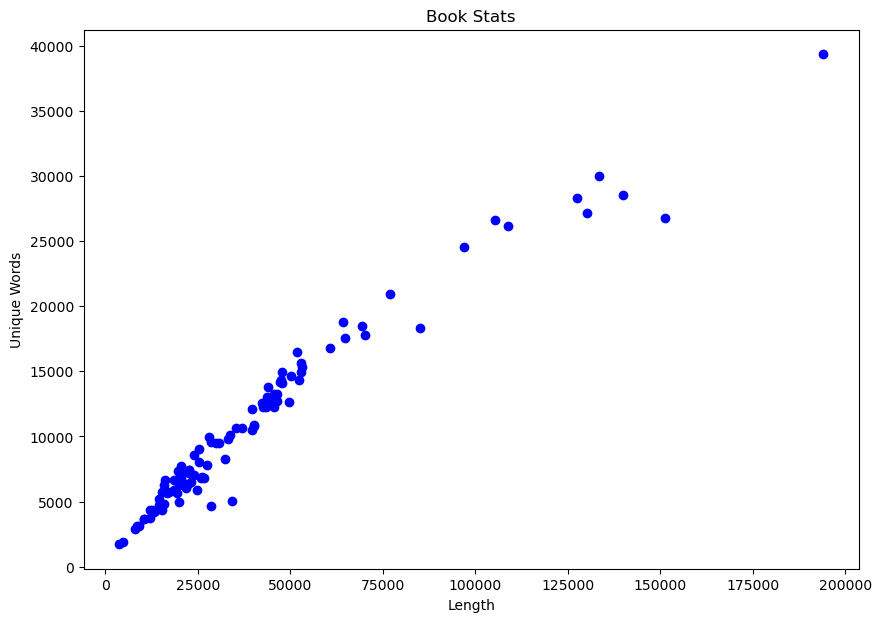

In [36]:
plt.figure(figsize=(10,7))
plt.plot(stats['Length'],stats['Unique'],"bo");
plt.title("Book Stats")
plt.xlabel("Length")
plt.ylabel("Unique Words");

The generated plot provides a visualization into the distribution of unique words among all the books, spanning from just under 5000 unique words to nearly 40000 unique words.

The books are categorized based on their languages, and the plot is rendered using the `loglog` method. This particular method modifies the scaling of both the horizontal and vertical axes, enabling a logarithmicscale representation of the data.

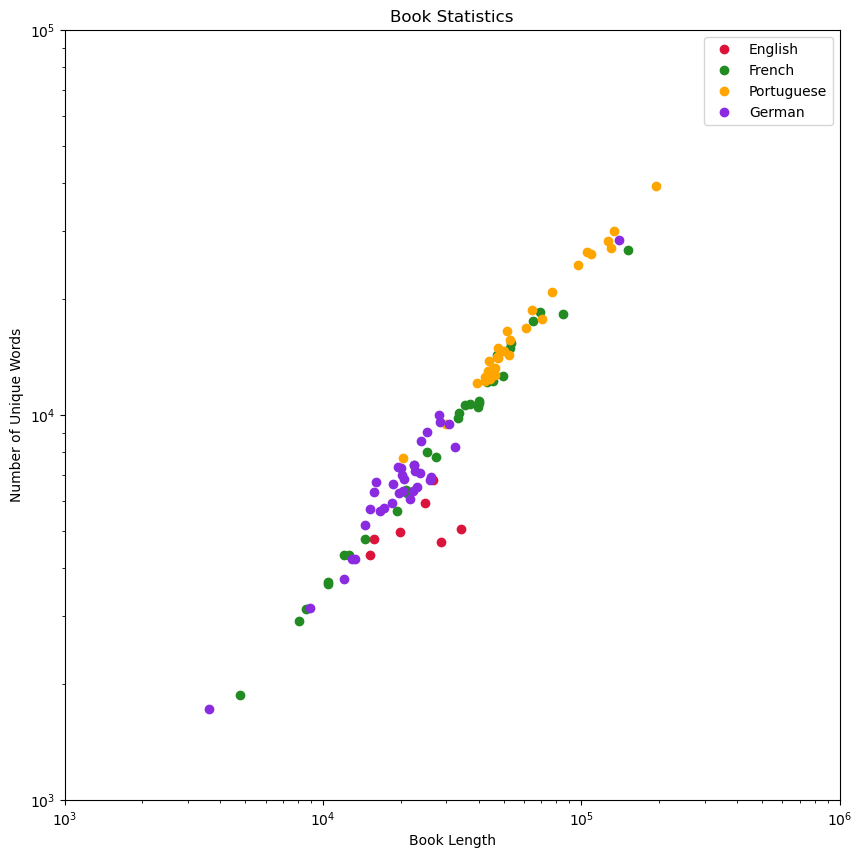

In [38]:
plt.figure(figsize=(10,10))

# plotting English books
subset = stats[stats['Language']=="English"]
plt.loglog(subset["Length"],subset["Unique"],"o",color="crimson",label="English");

# plotting French books
subset = stats[stats["Language"]=="French"]
plt.loglog(subset["Length"],subset["Unique"],"o",color="forestgreen",label="French");

# plotting Portuguese books
subset = stats[stats["Language"]=="Portuguese"]
plt.loglog(subset["Length"],subset["Unique"],"o",color="orange",label="Portuguese");

# plotting German books
subset = stats[stats["Language"]=="German"]
plt.loglog(subset["Length"],subset["Unique"],"o",color="blueviolet",label="German");

# tidying up the plot by giving titles,
# axis labels and legend
plt.title("Book Statistics");
plt.legend()
plt.xlabel("Book Length")
plt.ylabel("Number of Unique Words")
plt.xlim([10**3,10**6]);
plt.ylim([10**3,10**5]);

Upon categorizing the book statistics by language and plotting the data, a more insightful perspective regarding book length and unique word count is obtained. Notably, a Portuguese book stands out with 40000 unique words, while a German book displays a relatively small count of 1724 unique words.

The plot effectively illustrates that Portuguese books in this dataset tend to exhibit a higher number of unique words when compared to other languages.

## Investigating 'A Midsummer Night's Dream'
---

The primary objective is to analyze and visualize the distribution of word frequencies of `A Midsummer Night's Dream` for these five translations: English, French, German, Dutch and Finnish.

Specifically, the aim is to accomplish these following tasks:

- **Data Collection**: Gather the text data for various translations of the play "A Midsummer Night's Dream".
- **Word Frequency Distribution**: Process the text data to identify the frequency of each word in the different translations.
- **Summary Statistics** - Create summary statistics, such as mean, median, and standard deviation, to gain insights into the characteristics of the text for each translation.
- **Data Visualization** - Create visual representations to visually depict the word frequency distribution and summary statistics for each translation.

### Task 1
---

The data from a CSV file will be imported into a pandas dataframe using the `pd.read_csv` function.

The `index_col` argument will be utilized to set the first column in the CSV file as the index for the dataframe. This will ensure appropriate indexing for efficient data access and manipulation during subsequent analysis and visualization.

In [39]:
import pandas as pd 
import os 
import numpy as np
from collections import Counter 
import matplotlib.pyplot as plt 

In [40]:
file_loc = os.path.join("./",'midsummer.csv')

In [41]:
summer_nights = pd.read_csv(file_loc, index_col = 0)

The dataframe is structured with two columns: `Language`, denoting the langauage of translation, and `Text`, signifying the corresponding book content.

In [42]:
summer_nights

,Language,Text
0,French,ACTE PREMIERSCÈNE ILa scène représente un appa...
1,German,﻿The Project Gutenberg EBook of Ein Sommernach...
2,Finnish,ENSIMMÄINEN NÄYTÖS.Ensimmäinen kohtaus. Ate...
3,Dutch,EERSTE TOONEEL.Athene. Een Zaal in het paleis ...
4,English,A Midsommer Nights DreameActus primusEnter The...


### Task 2
---

- Computing the word frequency dictionary for the given `text` using the `count_words_fast` function. The resulting dictionary is stored as `counted_text`.
- Creating a pandas dataframe named `data`.
- Utilizing the `counted_text` dictionary to define two columns in the `data` dataframe:
    - `word`: containing each unique word present in the `text`
    - `count`: representing the frequency of occurrence of each word

In [43]:
def count_words_fast(text):
    """ 
    Cleans the input text by replacing punctuations with empty string.
    The function also counts the occurrence of each word in the input text.

    Inputs:
        text (str): The input text

    Returns: 
        Counter: A Counter object containing word frequencies
    """
    
    text = text.lower()
    skips = [".",",",";",":","'",'"',"\n","!","?","(",")"]
    
    for ch in skips:
        text = text.replace(ch,"")
        
    word_counts = Counter(text.split(" "))
    return word_counts

In [44]:
data = pd.DataFrame(columns=["Word","Count"])

For the time being, we are looking at the word count statistics only for French translation.

In [45]:
language, text = summer_nights.iloc[0]

counted_text = count_words_fast(text)
val = 0

for ele in counted_text:

    data.loc[val] = ele, counted_text[ele]
    val += 1

### Task 3
---

- Introducing a new column named `Length` into the `data` dataframe. This column represents the length of each word listed in the `word` column.
- Adding another column named `Frequency`. The values in this column will be determined as follows:
    - If the `count` for a word is greater than 10, label: `frequent`
    - If the `count` for a word is between 1 and 10 (exclusive), label: `infrequent`
    - If the `count` for a word is exactly 1, label: `unique`

In [46]:
# adding the new columns to data
data = pd.DataFrame(columns = ['Word','Count','Length','Frequency'])
# resetting the row index
val = 0

In [47]:
# looping through all the words
for ele in counted_text:
    
    # condition 1
    if counted_text[ele] > 10:
        data.loc[val] = ele, counted_text[ele],len(ele),"frequent"
        
    # condition 2
    elif counted_text[ele] > 1 and counted_text[ele] <= 10:
        data.loc[val] = ele, counted_text[ele], len(ele), "infrequent"
    
    # condition 3
    elif counted_text[ele] == 1:
        data.loc[val] = ele, counted_text[ele], len(ele), "unique"
        
    val += 1

In [48]:
unique_len = len(data.loc[data["Frequency"] == "unique"])
frequent_len = len(data.loc[data['Frequency'] == "frequent"])
infrequent_len = len(data.loc[data['Frequency'] == "infrequent"])

print("Word Stats for French Translation")
print("Frequent Words: {} | Infrequent Words: {} | Unique Words: {}".format(frequent_len, infrequent_len, unique_len))

Word Stats for French Translation
Frequent Words: 187 | Infrequent Words: 1183 | Unique Words: 4387


### Task 4
---

Creating a pandas dataframe named `sub_data` for calculating the following word statistics:

- `mean_word_length`: indicating the mean word length for each value
- `num_words`: representing the total number of words in each frequency category

The dataframe will also contain these columns:

- `frequency`: containing a list of string descriptions for word frequency
- `language`: representing the language of the text


In [49]:
sub_data = pd.DataFrame(columns = ["Language","Frequency","Mean Word Length","Num Words"])
frequency_list = ["frequent","infrequent","unique"]

In [50]:
#calculating the mean word length for each frequency
the_length = 0
mean_dict = {}

# looping over all three categories of word frequencies
for freq in frequency_list:
    
    # extracting the data for each word frequencies
    temporary_df = data.loc[data["Frequency"] == freq]
    
    # iterating through each word belonging
    # to a particular frequency
    for i in range(len(temporary_df)):
        
        # calculating the sum of word lengths
        # and storing them in 'the_length'
        val = temporary_df.iloc[i]["Length"]
        the_length += val
        
    # calculating mean word length by dividing
    # 'the_length' by number of entries
    mean_dict[freq] = (the_length / len(temporary_df))
    the_length = 0


In [51]:
row_count = 0

for freq_type in frequency_list:
    
    sub_data.loc[row_count] = language, freq_type, mean_dict[freq_type], len(data.loc[data["Frequency"] == freq_type])
    row_count += 1
    
print(sub_data)    

  Language   Frequency  Mean Word Length  Num Words
0   French    frequent          4.053476        187
1   French  infrequent          6.224852       1183
2   French      unique          9.719170       4387


### Task 5
---

Creating a pandas dataframe `grouped_data` to work with different translation of A Midsummer Night's Dream.

- Iterating through the rows of `summer_nights`, the following task will be performed:

    * Extracting the `language` and `text` values from the `i-th` row of `hamlets` using the `.iloc` method, storing them in variables
    * Invoking the `summarize_text` function with the `language` and `text` variables, storing them in `sub_data`
    * Appending the `sub_data` dataframe to `grouped_data` using `.append` function, ensuring the data is consolidated row-wise

### Helper Function

The `summarize_text` function takes the `language` and `text` as input and computes the word frequency and characteristics of the provided text.

In [52]:
def summarize_text(language,text):
    """   
    Summarizes the word frequency and characteristics of the given text.

    Inputs:
        language (str): The language of the text
        text (str): The input text

    Returns:
        pandas.DataFrame: A dataframe containing the word frequency
        and characteristics summary
    """
    
    counted_text = count_words_fast(text)
    
    data = pd.DataFrame({"Word": list(counted_text.keys()),"Count": list(counted_text.values())})
    
    data.loc[data["Count"] > 10, "frequency"] = "frequent"
    data.loc[data["Count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["Count"] == 1, "frequency"] = "unique"
    
    data["Length"] = data["Word"].apply(len)
    
    subset_data = pd.DataFrame({
                                "Language": language, 
                                "Frequency": ["frequent","infrequent","unique"], 
                                "Mean Word Length": data.groupby(by="frequency")["Length"].mean(),
                                "Num Words": data.groupby(by = 'frequency').size()
                               })
    
    return subset_data

In [53]:
grouped_data = pd.DataFrame()

In [54]:
for i in range(len(summer_nights)):
    
    language, text = summer_nights.iloc[i]
    print(language)
    sub_data = summarize_text(language,text)
    grouped_data = grouped_data.append(sub_data);

French
German
Finnish
Dutch
English


/var/folders/yr/xs9chqf96k95nh97118j_s7m0000gn/T/ipykernel_20864/2341973199.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_data = grouped_data.append(sub_data);
/var/folders/yr/xs9chqf96k95nh97118j_s7m0000gn/T/ipykernel_20864/2341973199.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_data = grouped_data.append(sub_data);
/var/folders/yr/xs9chqf96k95nh97118j_s7m0000gn/T/ipykernel_20864/2341973199.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_data = grouped_data.append(sub_data);
/var/folders/yr/xs9chqf96k95nh97118j_s7m0000gn/T/ipykernel_20864/2341973199.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

Filtering the dataframe to display only the rows corresponding to the Finnish translation of A Midsummer Night's Dream.

In [55]:
print(grouped_data.loc[grouped_data["Language"] == "Finnish"])

           Language   Frequency  Mean Word Length  Num Words
frequency                                                   
frequent    Finnish    frequent          4.261364         88
infrequent  Finnish  infrequent          5.994904        785
unique      Finnish      unique          9.941060       4547


Filtering the dataframe to display the rows representing words that occur frequently in different translations.

Among the languages, `Finnish` exhibits a comparatively lower frequency of frequent words (88), while the other languages show relatively higher frequencies.

In [56]:
print(grouped_data.loc[grouped_data["Frequency"] == "frequent"])

          Language Frequency  Mean Word Length  Num Words
frequency                                                
frequent    French  frequent          4.053476        187
frequent    German  frequent          3.872222        180
frequent   Finnish  frequent          4.261364         88
frequent     Dutch  frequent          3.754286        175
frequent   English  frequent          3.882682        179


### Task 6
---

Plotting the word statistics for each translations on a single plot.

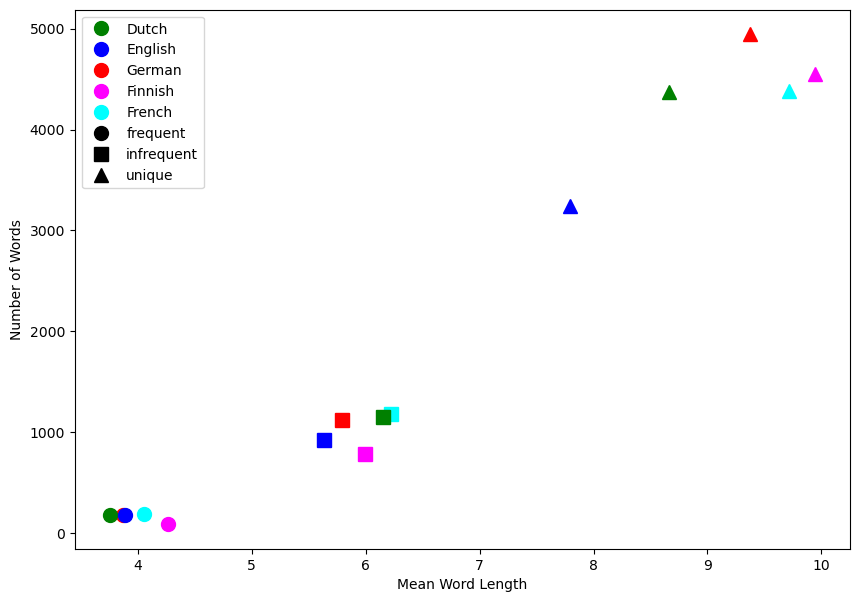

In [57]:
plt.figure(figsize=(10,7))

colors = {"Dutch": "green", "English": "blue", "German": "red", "Finnish": "magenta", "French": "cyan"}
markers = {"frequent": "o", "infrequent": "s", "unique": "^"}

for k in range(grouped_data.shape[0]):
    row = grouped_data.iloc[k]
    plt.plot(row["Mean Word Length"],row["Num Words"],marker = markers[row["Frequency"]], 
             color = colors[row["Language"]], markersize = 10)
    
color_legend = []
marker_legend = []

for color in colors:
    
    color_legend.append(plt.plot([],[],
                                 color = colors[color],
                                 marker = "o",
                                 label=color,
                                 markersize = 10,
                                 linestyle = "None"))
    
for marker in markers:
    
    marker_legend.append(plt.plot([],[],
                                  color = "k",
                                  marker = markers[marker],
                                  label = marker, 
                                  markersize = 10, 
                                  linestyle = "None"))
    
plt.legend(numpoints=1, loc = "upper left")

plt.xlabel("Mean Word Length")
plt.ylabel("Number of Words");

In the analysis comparing various translations of **A Midsummer Night's Dream**, notable distinctions emerge among the different languages. 

- The `German` translation stands out with the highest count of `unique` words, signifying it's linguistic richness. The `English` version displays distinct differences, both in terms of the count of unique words and word lengths, setting it apart from the remaining languages.

- For `infrequent` words, the translations in `Dutch` and `French` exhibit similarities in usage patterns. The `English` version diverges by demonstrating shorter word lengths. In contrast, `Finnish` translation demonstrates the lowest occurrence of infrequent words among all languages.

- Regarding `frequent` words, an intriguing convergence emerges across all five languages. `German` and `English` share a significant overlap. Additionally, the `Dutch` version distinguishes itself slightly by showcasing shortest word lengths, while `Finnish` translations exhibit longest word lengths.

---